In [4]:
import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats

import sys
sys.path.append("../")
import bayseg

### Create 2-dimensional latent field

In [36]:
n = 6
m = 6

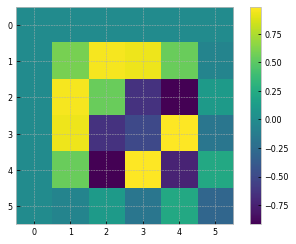

In [39]:
def func(x, y):
    return np.sin(y * x)

xaxis = np.linspace(0, 4, n)
yaxis = np.linspace(0, 4, m)
x, y = np.meshgrid(xaxis, yaxis)
result = func(x, y)

plt.imshow(result)
plt.colorbar()

In [40]:
latent_2d = np.zeros_like(result)

In [41]:
latent_2d[result > -0.5] = 1
latent_2d[result > 0.5] = 2
#latent_2d[0 >= result] = 1

In [42]:
np.unique(latent_2d)

array([ 0.,  1.,  2.])

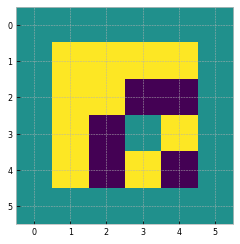

In [43]:
plt.imshow(latent_2d, interpolation="none")

### Sample

In [44]:
f = 4
c1 = scipy.stats.multivariate_normal([7.9, 7.5, 11, 3], np.eye(f) * 0.35)
c2 = scipy.stats.multivariate_normal([8, 7.9, 10.7, 2.9], np.eye(f) * 1.55)
c3 = scipy.stats.multivariate_normal([8.5, 9, 9, 1], np.eye(f) * 0.95)

In [45]:
obs = np.zeros((m,n,f))
np.shape(obs)

(6, 6, 4)

In [46]:
for i, x in enumerate(latent_2d[:,0]):
    for j, y in enumerate(latent_2d[0,:]):
        # generate a 2-d random vector at each point
        if latent_2d[i, j] == 0:
            obs[i,j,:] = c1.rvs()
        elif latent_2d[i, j] == 1:
            obs[i,j,:] = c2.rvs()
        elif latent_2d[i, j] == 2:
            obs[i,j,:] = c3.rvs()

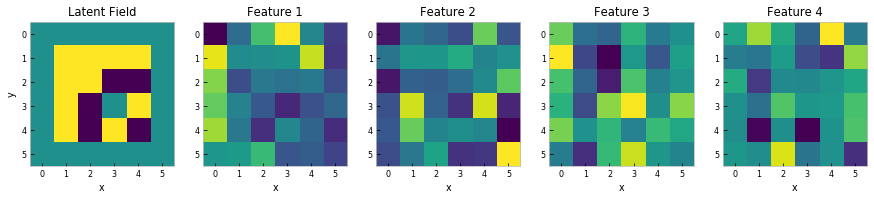

In [47]:
fig, ax = plt.subplots(ncols=5, figsize=(15,7))
for i in range(f+1):
    if i == 0:
        ax[i].imshow(latent_2d, interpolation="nearest")
        ax[i].set_ylabel("y")
        ax[i].set_title("Latent Field")
    else:
        ax[i].imshow(obs[:,:,i-1], interpolation="nearest")
        ax[i].set_title("Feature " + str(i))
    ax[i].grid(False)
    ax[i].set_xlabel("x")
    

In [140]:
feat = np.array([obs[:, :, f].reshape(clf.shape[0] * clf.shape[1]) for f in range(clf.n_feat)]).T

In [143]:
feat - clf.feat

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  

In [139]:
plt.imshow(obs[:,:,0] - clf.feat.reshape(6,6,6)[0,:,:])

ValueError: cannot reshape array of size 144 into shape (6,6,6)

### BaySeg initialization

In [48]:
np.shape(obs)

(6, 6, 4)

In [60]:
clf = bayseg.BaySeg(obs, 3, stamp=4, beta_init=100)

In [61]:
clf.fit(500, verbose=False, beta_jump_length=5, fix_beta=False)

100%|█████████████████████████████████████████████████████████████████████████████| 500/500 [00:11<00:00, 44.58it/s]


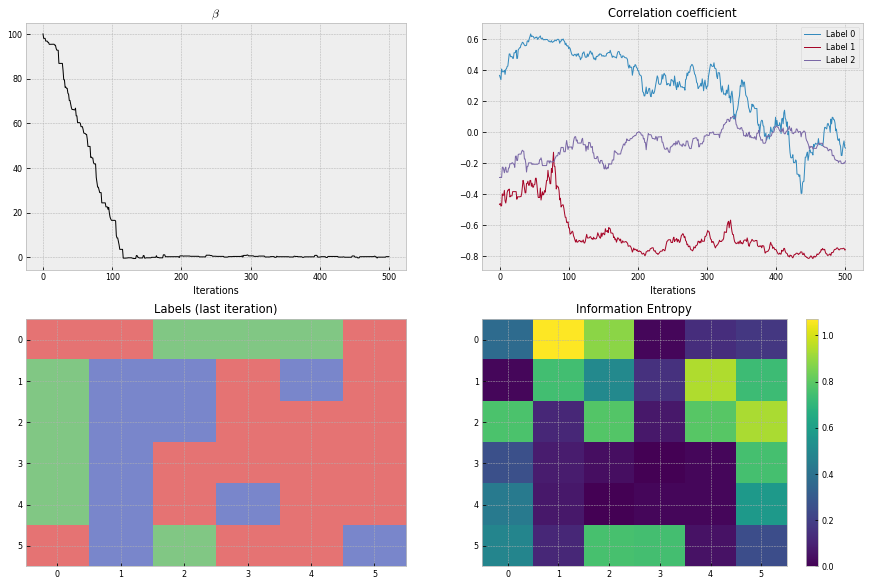

In [62]:
clf.diagnostics_plot()

In [82]:
a = np.array(clf.labels[:])

In [107]:
X,Y = np.meshgrid(np.arange(6), np.arange(6))

In [121]:
clf.labels[0].reshape(6,6)

array([[0, 1, 1, 1, 1, 0],
       [1, 2, 2, 0, 2, 0],
       [1, 2, 2, 0, 0, 0],
       [1, 2, 0, 0, 0, 0],
       [1, 2, 0, 2, 0, 0],
       [1, 2, 1, 0, 0, 2]], dtype=int64)

In [126]:
clf.calc_energy_like(clf.mus[0], clf.covs[-1]).reshape(3,6,6)

array([[[  2.61172684e+00,   3.27525884e+01,   2.59366397e+02,
           3.26607649e+00,   1.67352485e+00,   1.52210739e+02],
        [  6.80609208e+00,   3.53300461e+00,   5.92400508e+01,
           1.60804463e+01,   1.34009467e+00,   1.09690865e+02],
        [  9.65054533e+00,   2.58809467e+00,   2.50667228e+02,
           2.26421849e+00,   1.39242905e+01,   5.32346725e+01],
        [  2.39996086e+01,   6.74749538e+00,   3.81676514e+02,
           4.57041371e+00,   2.67826061e+00,  -1.63589454e-01],
        [  9.19276190e+00,   6.66689677e+00,   1.48559941e-01,
           3.44930839e+00,   1.20798665e+01,   2.49409442e+01],
        [  1.52254506e+01,   7.85834231e+00,   3.87672984e+00,
           1.67491793e+00,   1.06869099e+01,   2.48374918e+02]],

       [[  9.70297539e+00,   1.80329963e+00,   2.73925929e+02,
           9.22963290e+00,   1.35580495e+01,   9.87539149e-01],
        [  1.05205571e+01,   8.78147977e+00,   2.39676344e-02,
           5.57931763e-02,   1.15735454e+01,  

In [119]:
clf._calc_gibbs_energy_vect(clf.labels[0], 1).reshape(3,6,6)

array([[[ 2.,  2.,  3.,  2.,  2.,  1.],
        [ 3.,  4.,  3.,  3.,  1.,  1.],
        [ 3.,  4.,  2.,  1.,  1.,  0.],
        [ 3.,  3.,  2.,  1.,  0.,  0.],
        [ 3.,  3.,  3.,  0.,  1.,  1.],
        [ 2.,  3.,  1.,  2.,  1.,  0.]],

       [[ 0.,  2.,  1.,  1.,  2.,  1.],
        [ 2.,  2.,  3.,  3.,  3.,  3.],
        [ 3.,  3.,  4.,  4.,  4.,  3.],
        [ 3.,  3.,  4.,  4.,  4.,  3.],
        [ 3.,  3.,  3.,  4.,  4.,  3.],
        [ 1.,  1.,  3.,  2.,  3.,  2.]],

       [[ 2.,  2.,  2.,  3.,  2.,  2.],
        [ 1.,  2.,  2.,  2.,  4.,  2.],
        [ 0.,  1.,  2.,  3.,  3.,  3.],
        [ 0.,  2.,  2.,  3.,  4.,  3.],
        [ 0.,  2.,  2.,  4.,  3.,  2.],
        [ 1.,  2.,  2.,  2.,  2.,  2.]]])

array([[0, 1, 1, 1, 1, 0],
       [1, 2, 2, 0, 2, 0],
       [1, 2, 2, 0, 0, 0],
       [1, 2, 0, 0, 0, 0],
       [1, 2, 0, 2, 0, 0],
       [1, 2, 1, 0, 0, 2]], dtype=int64)

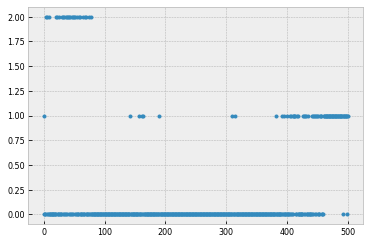

In [96]:
plt.plot(a[:,2], ".")

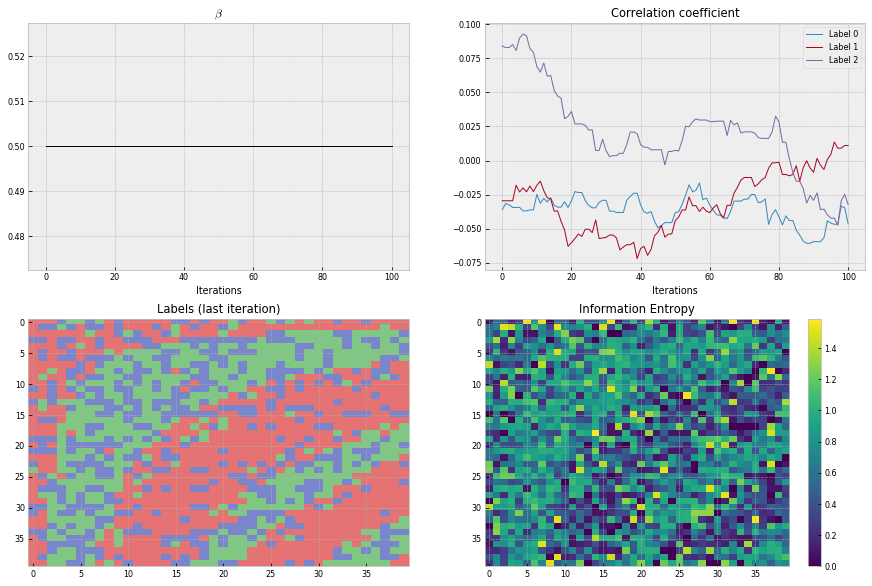

In [30]:
clf.diagnostics_plot()

In [18]:
clf.betas

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0.42244367736315314,
 0.42244367736315314,
 0.42244367736315314,
 0.42244367736315314,
 0.42244367736315314,
 0.42244367736315314,
 -0.26663985847373894,
 -0.26663985847373894,
 -0.26663985847373894,
 -0.26663985847373894,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.090224867699831013,
 0.09022

### Check labels draw

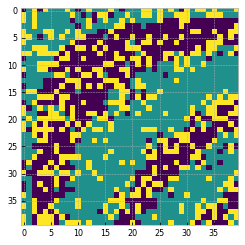

In [103]:
plt.imshow(labels.reshape(clf.shape[0], clf.shape[1]))

In [104]:
new_labels = copy.copy(labels)

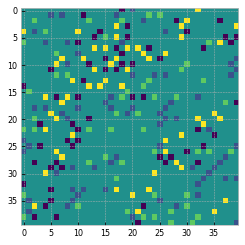

In [105]:
new_labels[clf.colors[0]] = draw_labels_vect(labels_prob[clf.colors[0]])
plt.imshow(labels.reshape(clf.shape[0], clf.shape[1]) - new_labels.reshape(clf.shape[0], clf.shape[1]))

In [106]:
newer_labels = copy.copy(labels)

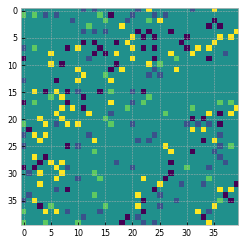

In [107]:
newer_labels[clf.colors[1]] = draw_labels_vect(labels_prob[clf.colors[1]])
plt.imshow(labels.reshape(clf.shape[0], clf.shape[1]) - newer_labels.reshape(clf.shape[0], clf.shape[1]))

### Pseudocoloring in 2D with 4-stamp

In [12]:
e = 10

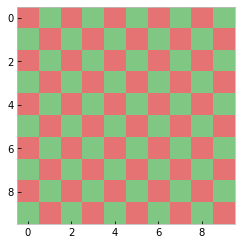

In [13]:
plt.imshow(np.tile(np.kron([[0, 1], [1, 0]] * int(e/2), np.ones((1, 1))), int(e/2)), cmap=bayseg.cmap, norm=bayseg.cmap_norm)
plt.grid(False)

### Pseudocoloring in 2D with 8-stamp

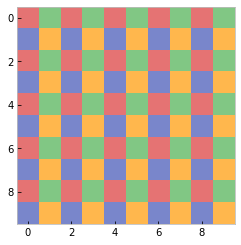

In [14]:
plt.imshow(np.tile(np.kron([[0, 1], [2, 3]] * int(e/2), np.ones((1, 1))), int(e/2)), cmap=bayseg.cmap, norm=bayseg.cmap_norm)
plt.grid(False)

In [18]:
np.shape(clf.colors)

(4, 25, 2)